# Logistic Regression

Analysing the "Iris" Dataset

In [1]:
import pyforest

In [2]:
iris_df=pd.read_csv('iris.csv')
iris_df.head()

<IPython.core.display.Javascript object>

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
iris_df.shape

(150, 5)

In [4]:
iris_df['species'].value_counts()

virginica     50
setosa        50
versicolor    50
Name: species, dtype: int64

In [5]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'petal_width')

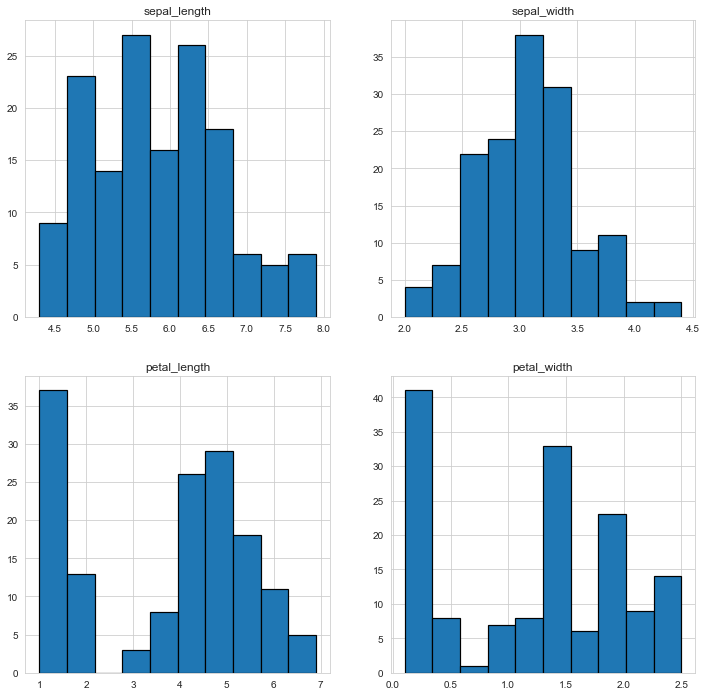

In [6]:
plt.figure(figsize=(12,12))
sns.set_style("whitegrid")
plt.subplot(221)
iris_df['sepal_length'].hist(linewidth=1.2,edgecolor='black')
plt.title('sepal_length')
plt.subplot(222)
iris_df['sepal_width'].hist(linewidth=1.2,edgecolor='black')
plt.title('sepal_width')
plt.subplot(223)
iris_df['petal_length'].hist(linewidth=1.2,edgecolor='black')
plt.title('petal_length')
plt.subplot(224)
iris_df['petal_width'].hist(linewidth=1.2,edgecolor='black')
plt.title('petal_width')

from the above graphs we observe that the distribution of sepal length and width are almost normal,but the distribution
of petal length and width are not normally distributed

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

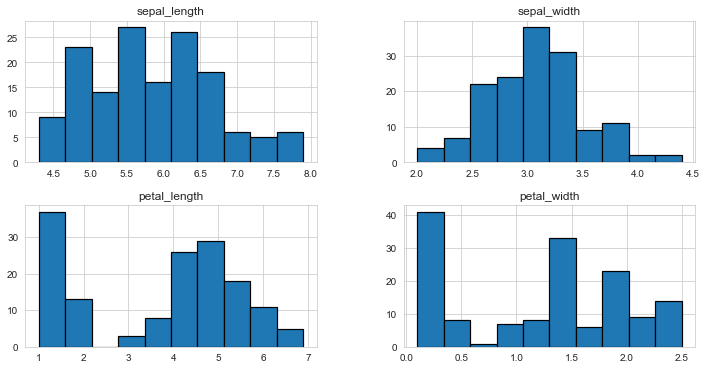

In [7]:
iris_df.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='species', ylabel='sepal_width'>

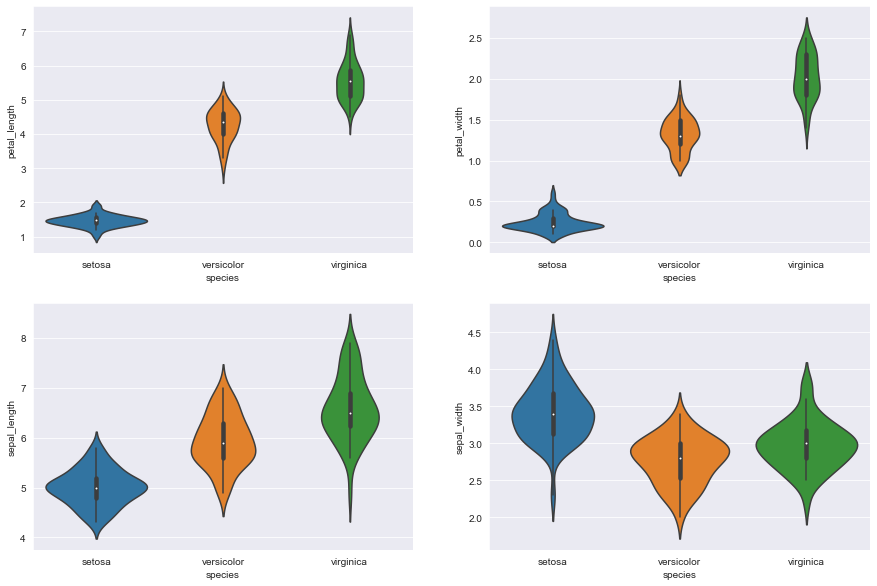

In [8]:
plt.figure(figsize=(15,10))
sns.set_style("darkgrid")
plt.subplot(2,2,1)
sns.violinplot(x='species',y='petal_length',data=iris_df)
plt.subplot(2,2,2)
sns.violinplot(x='species',y='petal_width',data=iris_df)
plt.subplot(2,2,3)
sns.violinplot(x='species',y='sepal_length',data=iris_df)
plt.subplot(2,2,4)
sns.violinplot(x='species',y='sepal_width',data=iris_df)

from the above graphs, we notice that the thinner voilin plots denoted less density ,fatter plots shows more density

In [9]:
ord_df=iris_df.iloc[:,0:4]

<IPython.core.display.Javascript object>

<AxesSubplot:>

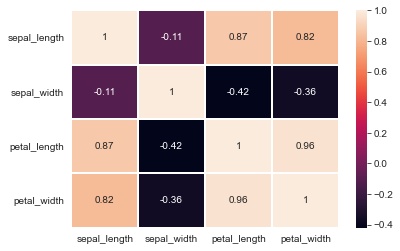

In [10]:
sns.heatmap(ord_df.corr(),annot=True,linewidths=1)

here we observe that sepal length and width are negatively correlated,while petal length and width are highly positively correlated

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

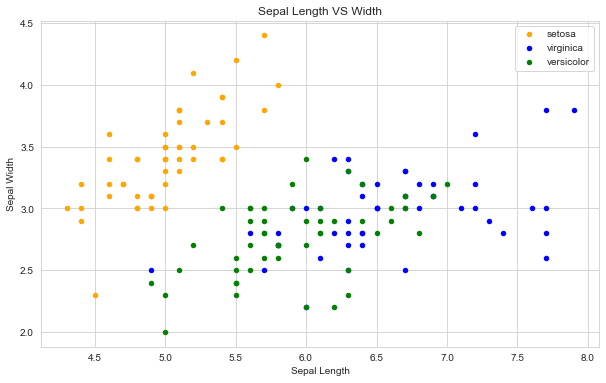

In [11]:
sns.set_style("whitegrid")
fig=iris_df[iris_df.species=='setosa'].plot(kind='scatter',x='sepal_length',y='sepal_width',color="orange",label='setosa')
iris_df[iris_df.species=='virginica'].plot(kind='scatter',x='sepal_length',y='sepal_width',color='blue',label='virginica',ax=fig)
iris_df[iris_df.species=='versicolor'].plot(kind='scatter',x='sepal_length',y='sepal_width',color='green',label='versicolor',ax=fig)
fig.set_xlabel("Sepal Length")
fig.set_ylabel("Sepal Width")
fig.set_title("Sepal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
#plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

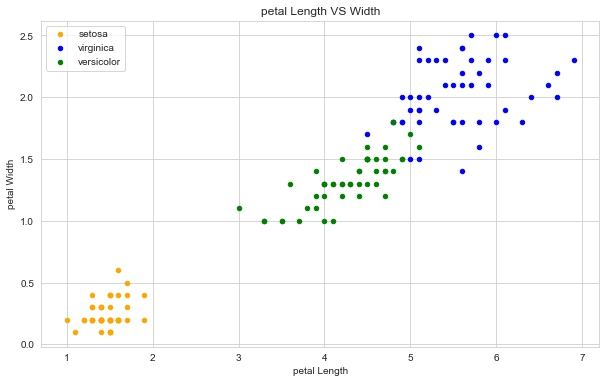

In [12]:
sns.set_style("whitegrid")
fig=iris_df[iris_df.species=='setosa'].plot(kind='scatter',x='petal_length',y='petal_width',color="orange",label='setosa')
iris_df[iris_df.species=='virginica'].plot(kind='scatter',x='petal_length',y='petal_width',color='blue',label='virginica',ax=fig)
iris_df[iris_df.species=='versicolor'].plot(kind='scatter',x='petal_length',y='petal_width',color='green',label='versicolor',ax=fig)
fig.set_xlabel("petal Length")
fig.set_ylabel("petal Width")
fig.set_title("petal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
#plt.show()

In [13]:
import warnings
warnings.simplefilter(action='ignore')

In [14]:
from sklearn.linear_model import LogisticRegression  # for Logistic Regression algorithm
from sklearn.model_selection import train_test_split #to spli

In [15]:
ind_df=iris_df[['sepal_length','sepal_width','petal_length','petal_width']]
ind_df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [16]:
x_train,x_test,y_train,y_test=train_test_split(ind_df,iris_df['species'],test_size=0.30)

In [17]:
model=LogisticRegression()
model.fit(x_train,y_train)
model.predict(x_test)

array(['setosa', 'virginica', 'virginica', 'setosa', 'setosa',
       'virginica', 'setosa', 'setosa', 'versicolor', 'setosa',
       'virginica', 'setosa', 'versicolor', 'versicolor', 'virginica',
       'virginica', 'versicolor', 'versicolor', 'setosa', 'versicolor',
       'setosa', 'virginica', 'versicolor', 'virginica', 'versicolor',
       'versicolor', 'versicolor', 'virginica', 'versicolor', 'virginica',
       'virginica', 'setosa', 'versicolor', 'virginica', 'setosa',
       'versicolor', 'setosa', 'virginica', 'virginica', 'setosa',
       'setosa', 'setosa', 'versicolor', 'setosa', 'virginica'],
      dtype=object)

In [18]:
model.score(x_test,y_test)

0.9555555555555556

In [19]:
sepal_df=iris_df[['sepal_length','sepal_width']]
s_x_train,s_x_test,s_y_train,s_y_test=train_test_split(sepal_df,iris_df['species'],test_size=0.3)

In [20]:
model=LogisticRegression()
model.fit(s_x_train,s_y_train)

LogisticRegression()

In [21]:
model.predict(s_x_test)

array(['setosa', 'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'setosa', 'versicolor', 'setosa',
       'virginica', 'setosa', 'virginica', 'versicolor', 'setosa',
       'virginica', 'virginica', 'versicolor', 'virginica', 'virginica',
       'versicolor', 'virginica', 'virginica', 'versicolor', 'setosa',
       'setosa', 'versicolor', 'virginica', 'virginica', 'setosa',
       'setosa', 'versicolor', 'versicolor', 'virginica', 'versicolor',
       'versicolor', 'virginica', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor'], dtype=object)

In [22]:
model.score(s_x_test,s_y_test)

0.8666666666666667

for checking the accuracy between sepal and petal

In [23]:
petal_df=iris_df[['petal_length','petal_width']]
p_x_train,p_x_test,p_y_train,p_y_test=train_test_split(petal_df,iris_df['species'],test_size=0.3)

In [24]:
model=LogisticRegression()
model.fit(p_x_train,p_y_train)
model.predict(p_x_test)

array(['setosa', 'virginica', 'versicolor', 'versicolor', 'setosa',
       'versicolor', 'versicolor', 'setosa', 'setosa', 'setosa',
       'virginica', 'virginica', 'virginica', 'virginica', 'virginica',
       'versicolor', 'versicolor', 'versicolor', 'versicolor', 'setosa',
       'setosa', 'versicolor', 'versicolor', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'versicolor',
       'setosa', 'setosa', 'setosa', 'versicolor', 'versicolor', 'setosa',
       'setosa', 'setosa', 'versicolor', 'virginica', 'setosa', 'setosa',
       'versicolor', 'virginica', 'virginica'], dtype=object)

In [25]:
model.score(p_x_test,p_y_test)

1.0

# conclusion:

we notice that we are getting better classification by using petal length and width over sepal length and width